In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy.stats import sem
from scipy.stats import pearsonr

### Examine Dataset

In [2]:
sal_data = pd.read_csv('salary.csv')
sal_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
data = pd.read_csv("Salary metadata.csv", sep='\t')
data.head()

,Variable;Type;Explanation
0,salary;Continuous;Annual salary in dollars
1,exprior;Continuous;Years of experience prior t...
2,yearsworked;Continuous;Years worked in this field
3,yearsrank;Continuous;Years worked at current r...
4,market;Continuous;Market value (1 = salary at ...


### 1. Responders and missing values

In [4]:
sal_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

Looking at the dataframe we see that we have missing value in the Salary column.

In [5]:
responders = sal_data.shape[0]
print("responders in the dataframe: ", responders)

responders in the dataframe:  514


In this Dataframe we have 514 responders 

### 2. Lowest & highest salary in the group

In [6]:
ls = np.min(sal_data['salary'])
print("Lowest salary: ", ls)

hs = np.max(sal_data['salary'])
print("Highest salary: ", hs)

Lowest salary:  29000.0
Highest salary:  96156.0


### 3. Mean salary & standard error of the mean

In [7]:
m = np.mean(sal_data['salary'])
print("Average salary: ", m)

sem = (sal_data['salary']).sem()
print("Standard error: ", sem)

Average salary:  50863.22009783626
Standard error:  560.0622753925232


### 4. Standard deviation for the years worked

In [8]:
std = np.std(sal_data['yearsworked'])
print("Standard deviation: ", std)

Standard deviation:  9.435503224576884


### 5. Median salary

In [9]:
med = (sal_data['salary']).median()
print("Median: ", med)

Median:  50096.0


### 6. Interquatile range

In [10]:
Q1 = sal_data['salary'].quantile(0.25)
Q3 = sal_data['salary'].quantile(0.75)

IQR = Q3 - Q1

print("The value of the interquartile range for salary in the sample is: ", IQR)

The value of the interquartile range for salary in the sample is:  20345.0


### 7. Total Men & Women in sample

In [11]:
sal_data.rename(columns={'male': 'Gender'},inplace=True)
assign = {0:'women', 1:'men'}
sal_data['Gender'] = sal_data['Gender'].map(assign)

a=pd.DataFrame(sal_data.groupby('Gender').size()).reset_index()
b=a.rename(columns={0:"Total"})
print(b)

  Gender  Total
0    men    386
1  women    128


### 8. Comparison between men & women Executives

In [12]:
ew = len(sal_data[(sal_data.Gender == 'women')&(sal_data.position == 3)])
print("Number of excutive women: ", ew)

em = len(sal_data[(sal_data.Gender == 'men')&(sal_data.position == 3)])
print("Number of excutive men: ", em)

Number of excutive women:  19
Number of excutive men:  192


### 9. Histogram fo Salary

/home/sibusiso/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sibusiso/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


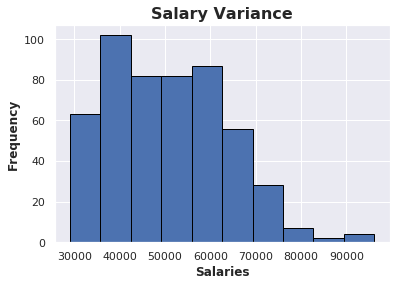

In [13]:
sns.set()
plt.hist(sal_data['salary'], edgecolor = 'black')
plt.title('Salary Variance', weight = 'bold', fontsize= 16)
plt.xlabel('Salaries', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.show()

### 10. Histogram and distribution for Salary.

/home/sibusiso/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sibusiso/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Density Distribution of salaries')

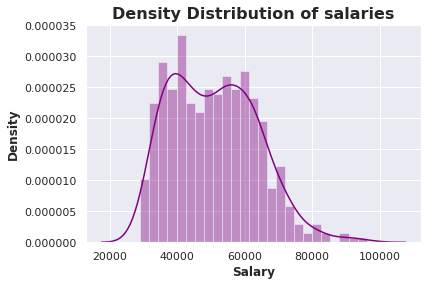

In [14]:
sns.distplot(sal_data['salary'], hist=True,kde = True, bins= int(50/2), color = 'purple')
plt.xlabel('Salary', weight= 'bold')
plt.ylabel('Density', weight= 'bold')
plt.title('Density Distribution of salaries', weight = 'bold', fontsize= 16)

### 11. Average salaries of men and women.

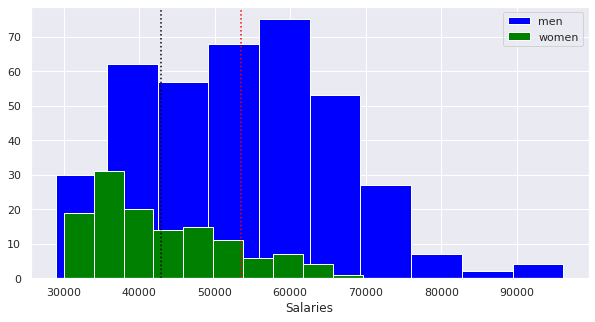

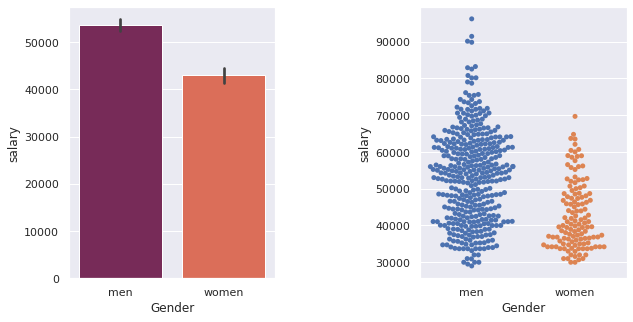

In [15]:
plt.figure(figsize=(10,5))
men = sal_data[sal_data.Gender == 'men'].salary
women = sal_data[sal_data.Gender == 'women'].salary

plt.hist(men, label='men', color="blue")
plt.hist(women, label='women', color="green")
plt.xlabel("Salaries")

plt.axvline(men.mean(), color='red', linestyle=':')
plt.axvline(women.mean(), color='black', linestyle=':')
plt.legend()

f, axes= plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="Gender", y="salary", data=sal_data, palette="rocket",ax= axes[0])
sns.swarmplot(x='Gender', y='salary', data=sal_data, palette="deep", ax= axes[1])
plt.subplots_adjust(wspace=0.7, hspace=0.3)

plt.show()

### 12. Relationship between Years Worked and Salary

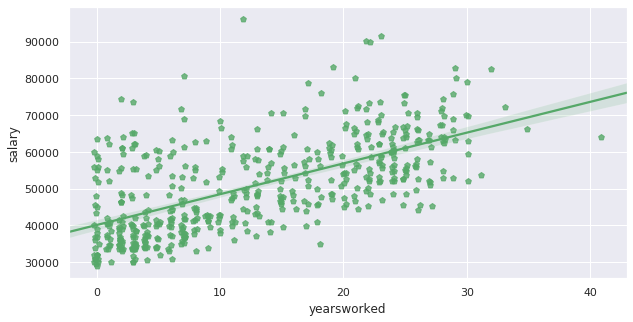

In [16]:
plt.figure(figsize=(10,5))
sns.regplot(x='yearsworked', y='salary', marker='p', x_jitter=.2, color ='g', data= sal_data)

### 13. Nature of the relationship between Years Worked and Salary.